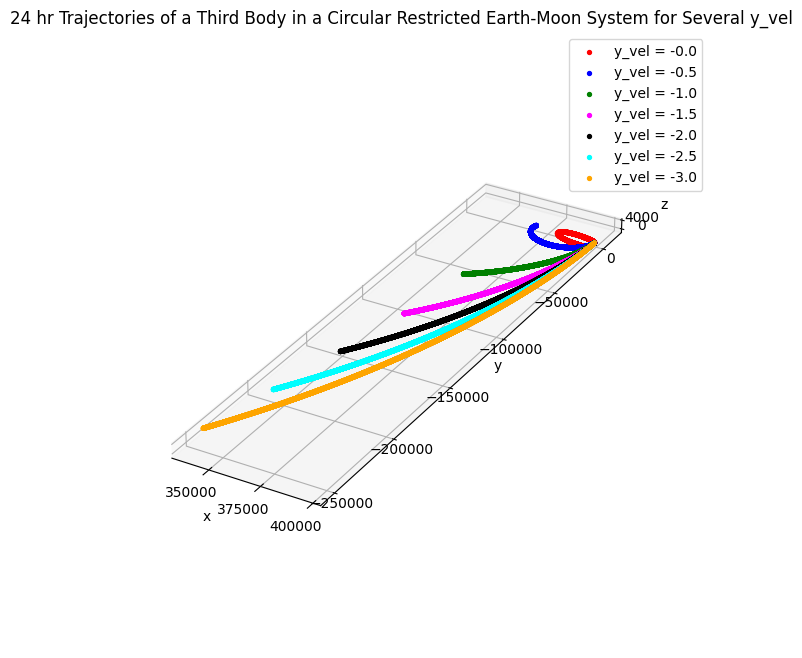

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constant definitions

omega = 2.662e-6

mu_1 = 398600.44

mu_2 = 4904.87

r_12 = 384748

m_1 = 5.974e24

m_2 = 73.48e21


# mass ratios
pi_1 = m_1 / (m_1 + m_2)

pi_2 = m_2 / (m_1 + m_2)


# x distances of pulling bodies
x_1 = - pi_2 * r_12

x_2 = pi_1 * r_12

# magnitude

def mag(vec):
  return np.sqrt(np.dot(vec, vec))

# Fehlberg coefficients
a = [0, 1/4, 3/8, 12/13, 1, 1/2]

b = [[0, 0, 0, 0, 0],
     [1/4, 0, 0, 0, 0],
     [3/32, 9/32, 0, 0, 0],
     [1932/2197, -7200/2197, 7296/2197, 0, 0],
     [439/216, -8, 3680/513, -845/4104, 0], [-8/27, 2, -3544/2565, 1859/4104, -11/40]]

c_star = [25/216, 0, 1408/2565, 2197/4104, -1/5, 0]

c = [16/135, 0, 6656/12825, 28561/56430, -9/50, 2/55]


# definitions of system of 1st order ODEs (2nd0 EQ of Motion split)

def f(state):
  # r_mag definitions here
  r1 = [state[0][0] - x_1, state[1][0], state[2][0]]
  r2 = [state[0][0] - x_2, state[1][0], state[2][0]]

  r1_mag = mag(r1)
  r2_mag = mag(r2)

  return np.array([[state[3][0]],
                   [state[4][0]],
                   [state[5][0]],
                   [2*omega*state[4][0] + omega*omega*state[0][0] - mu_1/r1_mag**3 * (state[0][0] + pi_2 * r_12) - mu_2 / r2_mag**3 * (state[0][0] - pi_1 * r_12)],
                   [-2*omega*state[3][0] + omega*omega*state[1][0] - mu_1/r1_mag**3 * state[1][0] - mu_2/r2_mag**3 * state[1][0]],
                   [-mu_1/r1_mag**3 * state[2][0] - mu_2/r2_mag**3 * state[2][0]]])


# definition of f derivatives

def f_1(state):
  return f(state)

def f_2(state, h):
  state_inner = state + h * b[1][0] * f_1(state)
  return f(state_inner)

def f_3(state, h):
  state_inner = state + h * (b[2][0] * f_1(state) + b[2][1] * f_2(state, h))
  return f(state_inner)

def f_4(state, h):
  state_inner = state + h * (b[3][0] * f_1(state) + b[3][1] * f_2(state, h) + b[3][2] * f_3(state, h))
  return f(state_inner)

def f_5(state, h):
  state_inner = state + h * (b[4][0] * f_1(state) + b[4][1] * f_2(state, h) + b[4][2] * f_3(state, h) + b[4][3] * f_4(state, h))
  return f(state_inner)

def f_6(state, h):
  state_inner = state + h * (b[5][0] * f_1(state) + b[5][1] * f_2(state, h) + b[5][2] * f_3(state, h) + b[5][3] * f_4(state, h) + b[5][4] * f_5(state, h))
  return f(state_inner)

# update functions (for time and state)

def update_time(t, h):
  return t + h

def update_state(state, h):
  f_tot = c[0] * f_1(state) + c[1] * f_2(state, h) + c[2] * f_3(state, h) + c[3] * f_4(state, h) + c[4] * f_5(state, h) + c[5] * f_6(state, h)
  return state + h * f_tot

def set_axes_equal(ax):
    '''Make axes of 3D plot have equal scale so that spheres appear as spheres,
    cubes as cubes, etc..  This is one possible solution to Matplotlib's
    ax.set_aspect('equal') and ax.axis('equal') not working for 3D.

    Input
      ax: a matplotlib axis, e.g., as output from plt.gca().
    '''

    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    # The plot bounding box is a sphere in the sense of the infinity
    # norm, hence I call half the max range the plot radius.
    plot_radius = 0.5*max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])


def rkf5(iteration_num, t0, tf, ax):
  # This is assuming that r_2 in the hw page is actually x_2

  xdata = []
  ydata = []
  zdata = []

  third_body_init = np.array([[1.05*x_2],
            [0],
            [0],
            [0],
            [-0.5*iteration_num],
            [0.05]])

  color_wheel = ['red', 'blue', 'green', 'magenta', 'black', 'cyan', 'orange']

  third_body_states = []
  third_body = third_body_init

  ts = []
  t = t0


  while t < tf:
    t_i = t
    ts.append(t_i)

    third_body_i = third_body
    third_body_states.append(third_body_i)

    xdata.append(third_body_i[0][0])
    ydata.append(third_body_i[1][0])
    zdata.append(third_body_i[2][0])

    h = 10

    t = update_time(t_i, h)
    third_body = update_state(third_body_i, h)

  ax.set_aspect('equal')

  ax.scatter3D(xdata, ydata, zdata, color=color_wheel[iteration_num], label='y_vel = '+str(-0.5*iteration_num), s=8)

  #if iteration_num == 6:
   # set_axes_equal(ax)

fig = plt.figure(figsize = (12,8))
ax = plt.axes(projection='3d')


for i in range(0, 7):
  rkf5(i, 0, 86400, ax)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.xaxis.set_major_locator(plt.MaxNLocator(3))
ax.zaxis.set_major_locator(plt.MaxNLocator(1))

ax.set_title('24 hr Trajectories of a Third Body in a Circular Restricted Earth-Moon System for Several y_vel')
ax.legend()
plt.show()

Below begins Question 2 solution: Gauss method of orbit predetermination

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

# Gauss angles-only method
# we are given azimuth and altitude angles
# we are also given time
# we have three measurements of each


# first need to determine geocentric position vector R
# function accepts:
# - radius of earth (R_E)
# - altitude of observer above surface (H)
# - geodetic latitude is \phi
# - local sidereal time is \theta
# - oblateness of the observing surface is f

# Defining the constants that we know:

r_E = 6378
H = 0
phi = 30.60083093
phi_rad = np.radians(phi)


longitude = -96.308665432

# determining the sidereal time
# assuming that the time provided is given in local time (CDT or GMT-5) and given on a 24 hr clock
def cstat_to_utc(hour, minute, second):
  new_hr = hour + 5
  return (new_hr, minute, second)

def cdt_find_ut(hour, minute, second):
  hr, min, sec = cstat_to_utc(hour, minute, second)
  return hr + min/60 + sec/3600

def find_j0(year, month, day):
  first = 367 * year
  second_not_corrected = 7 / 4 * (year + int((month+9)/12))
  second = int(second_not_corrected)
  third = int(275 * month / 9)

  return first - second + third + day + 1721013.5

def find_theta(year, month, day, hour, minute, second):
  j_0 = find_j0(year, month, day)
  t_0 = (j_0 - 2451545) / 36525

  theta_g_0 = 100.4606184 + 36000.77004*t_0 + 0.000387933*t_0*t_0 - 2.583e-8 * t_0**3

  theta_g_0 = theta_g_0 % 360

  theta_g = theta_g_0 + 360.98564724 * cdt_find_ut(hour, minute, second) / 24

  theta_current = theta_g + longitude

  return theta_current % 360

# theta is now found
# we also know oblateness of Earth
f = 0.003353

# Thus we can find position vector

def position_vec(year, month, day, hour, minute, second):
  theta = find_theta(year, month, day, hour, minute, second)
  theta_rad = np.radians(theta)

  kahuna_one = r_E / np.sqrt(1 - (2*f - f*f)*np.sin(phi_rad)*np.sin(phi_rad)) + H

  kahuna_two = r_E * (1 - f) * (1 - f) / np.sqrt(1 - (2*f - f*f)*np.sin(phi_rad)*np.sin(phi_rad)) + H

  first_comp = kahuna_one * np.cos(phi_rad) * np.cos(theta_rad)
  second_comp = kahuna_one * np.cos(phi_rad) * np.sin(theta_rad)
  third_comp = kahuna_two * np.sin(phi_rad)

  return np.array([first_comp, second_comp, third_comp])


# R position vectors should be found now

def rho_hat_vec(year, month, day, hour, minute, second, azimuth, altitude):
  az_rad = np.radians(azimuth)
  alt_rad = np.radians(altitude)

  rho_hat_begin = np.array([[np.cos(alt_rad) * np.sin(az_rad)],
                            [np.cos(alt_rad)*np.cos(az_rad)],
                            [np.sin(alt_rad)]])

  theta = find_theta(year, month, day, hour, minute, second)
  theta_rad = np.radians(theta)


  transform_matrix = np.array([[-np.sin(theta_rad), -np.sin(phi_rad) * np.cos(theta_rad), np.cos(phi_rad) * np.cos(theta_rad)],
                               [np.cos(theta_rad), -np.sin(phi_rad) * np.sin(theta_rad), np.cos(phi_rad) * np.sin(theta_rad)],
                               [0, np.cos(phi_rad), np.sin(phi_rad)]])

  rho_hat_end = transform_matrix @ rho_hat_begin

  return rho_hat_end.T[0]

# direction cosine vectors should be found now


# With the position and DC vectors, we transition into algorithm 5.5, or Gauss method of preliminary orbit determination
# Step 1 is to calculate the time intervals tau_1, tau_3, and tau
# We first standardize the time (the first measurement will be t = 0)

t_1 = 0
t_2 = 32 + 1*60
t_3 = 37 + 4*60

tau_1 = t_1 - t_2
tau_3 = t_3 - t_2
tau = t_3 - t_1

# Step 2 is to calculate cross products of DC vectors from measurements

rho_1 = rho_hat_vec(2023, 4, 7, 6, 5, 13, 224, 26)
rho_2 = rho_hat_vec(2023, 4, 7, 6, 6, 45, 147, 68)
rho_3 = rho_hat_vec(2023, 4, 7, 6, 9, 50, 64, 10)

p_1 = np.cross(rho_2, rho_3)
p_2 = np.cross(rho_1, rho_3)
p_3 = np.cross(rho_1, rho_2)

# Step 3 is to calculate D_0

D_0 = np.dot(rho_1, p_1)

# Step 4 is to calculate the nine scalar quantities of the DCM
# this will be organized as a 2D list for ease of code comprehension

R_1 = position_vec(2023, 4, 7, 6, 5, 13)
R_2 = position_vec(2023, 4, 7, 6, 6, 45)
R_3 = position_vec(2023, 4, 7, 6, 9, 50)

D = [['mt', 'mt', 'mt', 'mt'],
     ['mt', np.dot(R_1, p_1), np.dot(R_1, p_2), np.dot(R_1, p_3)],
     ['mt', np.dot(R_2, p_1), np.dot(R_2, p_2), np.dot(R_2, p_3)],
     ['mt', np.dot(R_3, p_1), np.dot(R_3, p_2), np.dot(R_3, p_3)]]

# Step 5 is to calculate A and B

A = 1 / D_0 * (-D[1][2] * tau_3/tau + D[2][2] + D[3][2]*tau_1/tau)

B = 1/6/D_0 * (D[1][2] * (tau_3*tau_3 - tau*tau)*tau_3/tau + D[3][2]*(tau*tau - tau_1*tau_1)*tau_1/tau)

# Step 6 is to calculate E and calculate R_2^2

E = np.dot(R_2, rho_2)
R2_mag_sq = np.dot(R_2, R_2)

# Step 7 is to calculate a, b, and c

mu = 398600

a = -(A*A + 2*A*E + R2_mag_sq)

b = -2*mu*B*(A+E)

c = -mu*mu*B*B

# Step 8 is to find solutions to the 8th degree equation described in Equation 5.116 (x = r_scal_2)

def big_fish(x):
  return x**8 + a * x**6 + b*x**3 + c

xs = np.linspace(0, 8000, 1000)
ys = [big_fish(x) for x in xs]

#plt.plot(xs, ys)

root = optimize.brenth(big_fish, 5000, 7750)

# Step 9 calculates the scalar quantitutes rho_scal_1, rho_scal_2, rho_scal_3

num_pack_1 = 6 * (D[3][1] * tau_1 / tau_3 + D[2][1] * tau / tau_3) * root**3 + mu * D[3][1] * (tau*tau - tau_1*tau_1) * tau_1 / tau_3
denom_pack_1 = 6 * root**3 + mu * (tau*tau - tau_3*tau_3)
rho_scal_1 = 1 / D_0 * (num_pack_1/denom_pack_1 - D[1][1])

rho_scal_2 = A + mu*B/root**3

num_pack_3 = 6 * (D[1][3] * tau_3 / tau_1 - D[2][3] * tau/tau_1) * root**3 + mu * D[1][3] * (tau*tau - tau_3*tau_3) * tau_3/tau_1
denom_pack_3 = 6 * root**3 + mu * (tau*tau - tau_1*tau_1)
rho_scal_3 = 1 / D_0 * (num_pack_3/denom_pack_3 - D[3][3])

# Step 10 calculates the total position vectors (r_1, r_2, r_3)

r_1 = R_1 + rho_scal_1 * rho_1
r_2 = R_2 + rho_scal_2 * rho_2
r_3 = R_3 + rho_scal_3 * rho_3

# Step 11 calculates the Lagrange coefficients f_1, g_1, f_3, g_3
# if there is non-negligible error in answer, use iterative improvement of Algorithm 5.5

f_1 = 1 - mu*tau_1*tau_1 / 2 / root**3

f_3 = 1 - mu*tau_3*tau_3 / 2 / root**3

g_1 = tau_1 - mu*tau_1**3 / 6 / root**3

g_3 = tau_3 - mu*tau_3**3 / 6 / root**3

# Step 12 calculates v_2 vector

v_2 = 1 / (f_1*g_3 - f_3*g_1) * (-f_3*r_1 + f_1*r_3)

# We now transition into Algorithm 5.6 for improvement of Lagrange coefficient approximations
########################################################################
def c_stumpff(z):
  if z > 1e-8:
    return (1 - np.cos(np.sqrt(z))) / z
  elif z < -1e-8:
    return (np.cosh(-np.sqrt(z)) - 1) / (-z)
  else:
    return 1/2

def s_stumpff(z):
  if z > 1e-8:
    num = np.sqrt(z) - np.sin(np.sqrt(z))
    denom = (np.sqrt(z))**3
    return num/denom
  elif z < -1e-8:
    num = np.sinh(np.sqrt(-z)) - np.sqrt(-z)
    denom = (np.sqrt(z))**3
    return num/denom
  else:
    return 1/6

for it in range(0, 25):
  r_2_mag = mag(r_2)
  v_2_mag = mag(v_2)

  alpha = 2 / r_2_mag - v_2_mag*v_2_mag / mu

  v_2_radial = np.dot(v_2, r_2) / r_2_mag

  # chi_1
  ratio_1 = 1
  chi_1 = np.sqrt(mu) * np.abs(alpha) * tau_1

  while np.abs(ratio_1) > 1e-8:
    f_chi_1 = r_2_mag * v_2_radial / np.sqrt(mu) * chi_1*chi_1 * c_stumpff(alpha*chi_1*chi_1) + (1 - alpha*r_2_mag)*(chi_1**3)*s_stumpff(alpha*chi_1*chi_1) + r_2_mag*chi_1 - np.sqrt(mu)*tau_1

    f_prime_chi_1 = r_2_mag * v_2_radial / np.sqrt(mu) * (1 - alpha*chi_1*chi_1 * s_stumpff(alpha*chi_1*chi_1)) + (1 - alpha*r_2_mag)*chi_1*chi_1*c_stumpff(alpha*chi_1*chi_1) + r_2_mag

    ratio_1 = f_chi_1/f_prime_chi_1

    chi_1 = chi_1 - ratio_1

  # chi_3
  ratio_3 = 1
  chi_3 = np.sqrt(mu) * np.abs(alpha) * tau_3

  while np.abs(ratio_3) > 1e-8:
    f_chi_3 = r_2_mag * v_2_radial / np.sqrt(mu) * chi_3*chi_3 * c_stumpff(alpha*chi_3*chi_3) + (1 - alpha*r_2_mag)*(chi_3**3)*s_stumpff(alpha*chi_3*chi_3) + r_2_mag*chi_3 - np.sqrt(mu)*tau_3

    f_prime_chi_3 = r_2_mag * v_2_radial / np.sqrt(mu) * (1 - alpha*chi_3*chi_3 * s_stumpff(alpha*chi_3*chi_3)) + (1 - alpha*r_2_mag)*chi_3*chi_3*c_stumpff(alpha*chi_3*chi_3) + r_2_mag

    ratio_3 = f_chi_3/f_prime_chi_3

    chi_3 = chi_3 - ratio_3

  f_1 = 1 - chi_1*chi_1/r_2_mag * c_stumpff(alpha*chi_1*chi_1)

  f_3 = 1 - chi_3*chi_3/r_2_mag * c_stumpff(alpha*chi_3*chi_3)

  g_1 = tau_1 - 1/np.sqrt(mu) * (chi_1)**3 * s_stumpff(alpha*chi_1*chi_1)

  g_3 = tau_3 - 1/np.sqrt(mu) * (chi_3)**3 * s_stumpff(alpha*chi_3*chi_3)

  c_1 = g_3 / (f_1*g_3 - f_3*g_1)
  c_3 = - g_1 / (f_1*g_3 - f_3*g_1)

  rho_scal_1 = 1/D_0 * (-D[1][1] + 1/c_1 * D[2][1] - c_3/c_1 * D[3][1])
  rho_scal_2 = 1/D_0 * (-c_1*D[1][2] + D[2][2] - c_3*D[3][2])
  rho_scal_3 = 1/D_0 * (-c_1/c_3 * D[1][3] + 1/c_3*D[2][3] - D[3][3])

  r_1 = R_1 + rho_scal_1 * rho_1
  r_2 = R_2 + rho_scal_2 * rho_2
  r_3 = R_3 + rho_scal_3 * rho_3

  v_2 = 1 / (f_1*g_3 - f_3*g_1) * (-f_3*r_1 + f_1*r_3)





################################################################################## - CURRENT WORK PROGRESS
# Step 3 calculates the radial velocity

radial_vel = np.dot(r_2, v_2) / r_2_mag

# Step 4 calculates the angular momentum

h_vec = np.cross(r_2, v_2)

# Step 5 calculates the magnitude of the angular momentum

h_mag = mag(h_vec)

# Step 6 calculates the inclination

inclination = np.arccos(h_vec[2] / h_mag)

# Step 7 calculates the node line vector (N)

K_hat = np.array([0, 0, 1])
N = np.cross(K_hat, h_vec)

# Step 8 calculates the magnitude of N
N_mag = mag(N)

# Step 9 find the right ascension of the ascending node
omega = 0
if N[1] < 0:
  omega = 2*np.pi - np.arccos(N[0]/N_mag)
else:
  omega = np.arccos(N[0]/N_mag)

# Step 10 calculates the eccentricity vector

e_vec = 1 / mu * ((v_2_mag*v_2_mag - mu/r_2_mag)*r_2 - r_2_mag*radial_vel*v_2)

# Step 11 calculates the eccentricity magnitude

e_mag = mag(e_vec)

# We can end the algorithm here, as the other elements are not needed/not required to be known
# We now find the semimajor axis to be

semimajor_axis = h_mag*h_mag / mu / (1 - e_mag * e_mag)

# just to check for reasonability

periapsis = semimajor_axis * (1 - e_mag)

print('The calculated r_2 is:')
print(r_2)
print(r_2_mag)
print()
print('The calculated v_2 is:')
print(v_2)
print(v_2_mag)
print()
print('The inclination is', np.degrees(inclination), 'degrees')
print()
print('The eccentricity is', e_mag)
print()
print('The semimajor axis is', semimajor_axis, 'km')
print()





The calculated r_2 is:
[ -349.95595988 -5825.83286035  3299.63284236]
6704.504052124039

The calculated v_2 is:
[5.80583257 1.25602656 2.9712116 ]
6.641791394587332

The inclination is 41.43187327925832 degrees

The eccentricity is 0.25819552990169126

The semimajor axis is 5329.464947748273 km

